# Assignment 4

Team:

- Bertan Karacora

## Setup
<a id="setup"></a>

### Config
<a id="setup_config"></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import assignment.config as config

Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_4/assignment/config.yaml


In [3]:
config.list_available()

['kth copy 2', 'kth copy 3', 'kth copy', 'kth_customlstm']

### Modules
<a id="setup_modules"></a>

In [4]:
from pathlib import Path

import assignment.scripts.init_exp as init_exp
from assignment.evaluation.evaluator import Evaluator
from assignment.training.trainer import Trainer
import assignment.libs.utils_checkpoints as utils_checkpoints
import assignment.libs.utils_data as utils_data
import assignment.visualization.plot as plot
import assignment.visualization.visualize as visualize

### Paths and names
<a id="setup_paths_and_names"></a>

In [5]:
name_exp_customlstm = "kth_customlstm"

path_dir_exp_customlstm = Path(config._PATH_DIR_EXPS) / name_exp_customlstm

## Data augmentation
<a id="data_augmentation"></a>

### Visualization
<a id="data_augmentation_visualization"></a>

In [67]:
init_exp.init_exp(name_exp=name_exp_customlstm, name_config=name_exp_customlstm)
config.set_config_exp(path_dir_exp_customlstm)

Initializing experiment kth_customlstm...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/tensorboard
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_4/assignment/configs/kth_customlstm.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/config.yaml
Initializing 

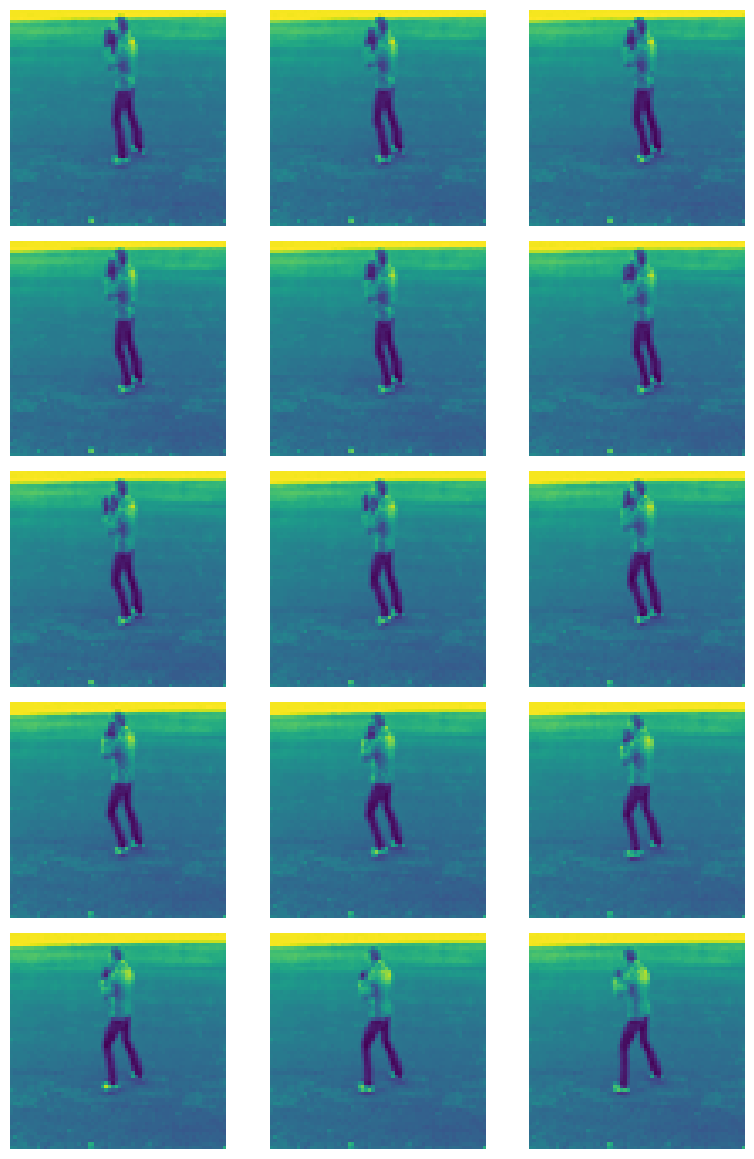

In [68]:
dataset_test, dataloader_test = utils_data.create_dataset_and_dataloader(split="test")
images, labels = utils_data.sample(dataloader_test, num_samples=1)

visualize.visualize_images(images[0])

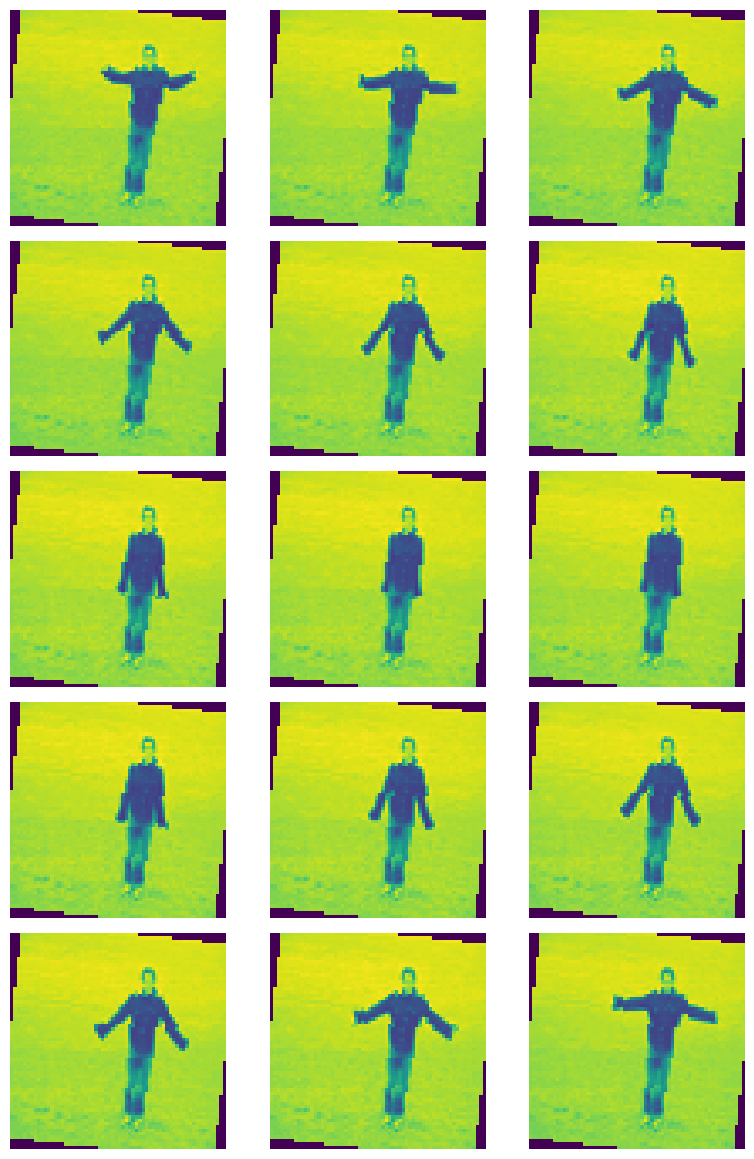

In [69]:
dataset_train, dataloader_train = utils_data.create_dataset_and_dataloader(split="train")
images, labels = utils_data.sample(dataloader_train, num_samples=1)

visualize.visualize_images(images[0])

## Comparison of fine-tuned models
<a id="comparison_of_fine_tuned_models"></a>

In [59]:
init_exp.init_exp(name_exp=name_exp_customlstm, name_config=name_exp_customlstm)
config.set_config_exp(path_dir_exp_customlstm)

Initializing experiment kth_customlstm...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/tensorboard
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_4/assignment/configs/kth_customlstm.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_4/experiments/kth_customlstm/config.yaml
Initializing 

In [66]:
trainer = Trainer(name_exp_customlstm)
trainer.loop(config.TRAINING["num_epochs"])
log = trainer.log

plot.plot_loss(log)
plot.plot_metrics(log)

Setting up dataloaders...
Train dataset
Dataset KTH
    Number of datapoints: 4469
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_4/data/kth
    Split: train
    Transform: Compose(
      RandomHorizontalFlip(p=0.5)
      RandomRotation(degrees=[-10.0, 10.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0)
)
    Transform of target: None
Validate dataset
Dataset KTH
    Number of datapoints: 4332
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_4/data/kth
    Split: validate
    Transform: None
    Transform of target: None
Setting up dataloaders finished
Setting up model...
Model
torch.Size([2, 1, 64, 64])
torch.Size([8192])


RuntimeError: Failed to run torchsummary. See above stack traces for more details. Executed layers up to: []

In [ ]:
_, model, _, _ = utils_checkpoints.load(path_dir_exp_customlstm / "checkpoints" / "final.pth")

evaluator = Evaluator(name_exp_customlstm, model)
evaluator.evaluate()

print(f"Loss on test data: {evaluator.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

### MobileNet
<a id="comparison_of_fine_tuned_models_mobilenet"></a>

In [ ]:
init_exp.init_exp(name_exp=name_exp_mobilenet, name_config=name_exp_mobilenet)
config.set_config_exp(path_dir_exp_mobilenet)

In [ ]:
trainer = Trainer(name_exp_mobilenet)
trainer.loop(config.TRAINING["num_epochs"])
log_mobilenet = trainer.log

plot.plot_loss(log_mobilenet)
plot.plot_metrics(log_mobilenet)

In [ ]:
_, model_mobilenet, _, _ = utils_checkpoints.load(path_dir_exp_mobilenet / "checkpoints" / "final.pth")

evaluator_mobilenet = Evaluator(name_exp_mobilenet, model_mobilenet)
evaluator_mobilenet.evaluate()

print(f"Loss on test data: {evaluator_mobilenet.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_mobilenet.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

### ConvNext
<a id="comparison_of_fine_tuned_models_convnext"></a>

In [ ]:
init_exp.init_exp(name_exp=name_exp_convnext, name_config=name_exp_convnext)
config.set_config_exp(path_dir_exp_convnext)

In [ ]:
trainer = Trainer(name_exp_convnext)
trainer.loop(config.TRAINING["num_epochs"])
log_convnext = trainer.log

plot.plot_loss(log_convnext)
plot.plot_metrics(log_convnext)

In [ ]:
_, model_convnext, _, _ = utils_checkpoints.load(path_dir_exp_convnext / "checkpoints" / "final.pth")

evaluator_convnext= Evaluator(name_exp_convnext, model_convnext)
evaluator_convnext.evaluate()

print(f"Loss on test data: {evaluator_convnext.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_convnext.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

### Discussion
<a id="comparison_of_fine_tuned_models_discussion"></a>

> Unfortunately, I am running out of time. Therefore, I was only able to run the training for a few epochs. I did have a lot of problems with these tasks. Some issues just cost me time, e.g., I was running out of CUDA memory as some other people used the GPU. In the end, I switched to another remote machine, but I did have to do my entire setup again. Also downloading the dataset did cost me some time, as it was not straight-forward to find a link to download it (the original one is still broken).
>
> Regarding the results of my experiments: For ResNet, the validation loss is actually mostly smaller the the train loss. This might be due to the augmentations which make it harder to identify the cars in the train set. The final accuracy is around $0.24$ which is rather low. In general, classifying almost $200$ different cars is the first time that the task is a little difficult. So a rather low value might be expectable. Combpared with the ImageNet dataset which the models have been trained on before fine-tuning, all of them reach much higher scores even with $1000$ classes in that dataset. The objects are easier to distinguish than car models (at least from a human perspective) but still, my results are suboptimal. One could definitely say, there is underfitting with  that low scores and the validation metrics exceeding the training metrics. Let me know, if you know what went wrong for me here.
>
> The MobileNet reaches a score of roughly $0.17$ which is worse. However, the MobileNet is also a much smaller model. Finally, the ConvNext reaches approx. $0.45$ which is by far the best. Even though it is only trained for 10 epochs. Once again, it is also the largest model (number of parameters is printed above).
>
> In the end, I noticed that the validation loss and accuracy stagnate for some epochs before going in the right direction (in case of the MobileNet experiment). Maybe this indicates a learning rate issue and what is observable there is the scheduler mitigating the problem at some point.

## Comparison of transfer learning approaches
<a id="comparison_of_transfer_learning_approaches"></a>

### Fixed feature extraction
<a id="comparison_of_transfer_learning_approaches_fixed_feature_extraction"></a>

In [ ]:
init_exp.init_exp(name_exp=name_exp_mobilenet_fixed, name_config=name_exp_mobilenet_fixed)
config.set_config_exp(path_dir_exp_mobilenet_fixed)

In [ ]:
trainer = Trainer(name_exp_mobilenet_fixed)
trainer.loop(5)
log_mobilenet_fixed = trainer.log

plot.plot_loss(log_mobilenet_fixed)
plot.plot_metrics(log_mobilenet_fixed)

In [ ]:
_, model_mobilenet_fixed, _, _ = utils_checkpoints.load(path_dir_exp_mobilenet_fixed / "checkpoints" / "final.pth")

evaluator_mobilenet = Evaluator(name_exp_mobilenet_fixed, model_mobilenet_fixed)
evaluator_mobilenet.evaluate()

print(f"Loss on test data: {evaluator_mobilenet.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_mobilenet.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

### Fine-tuning
<a id="comparison_of_transfer_learning_approaches_fine_tuning"></a>

See [above](#comparison_of_fine_tuned_models_mobilenet).

### Combined approach
<a id="comparison_of_transfer_learning_approaches_combined_approach"></a>

In [ ]:
init_exp.init_exp(name_exp=name_exp_mobilenet_combined, name_config=name_exp_mobilenet_combined)
config.set_config_exp(path_dir_exp_mobilenet_combined)

In [ ]:
trainer = Trainer(name_exp_mobilenet_combined)
trainer.loop(10)
log_mobilenet_combined = trainer.log

plot.plot_loss(log_mobilenet_combined)
plot.plot_metrics(log_mobilenet_combined)

In [ ]:
_, model_mobilenet_combined, _, _ = utils_checkpoints.load(path_dir_exp_mobilenet_combined / "checkpoints" / "final.pth")

evaluator_mobilenet = Evaluator(name_exp_mobilenet_combined, model_mobilenet_combined)
evaluator_mobilenet.evaluate()

print(f"Loss on test data: {evaluator_mobilenet.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_mobilenet.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

### Discussion
<a id="comparison_of_transfer_learning_approaches_discussion"></a>

> I implemented everything I need to do this but I ran out of time to run experiments longer than a few epochs. In summary, the fixed feature extractor approach results to lower accuracy in these first epochs. Only adapting the head of the model limits its capabilities with regard to classifying cars instead of different objects and animals. Still, the backbone trained on the ImageNet dataset provides the features that allow to do at least some classification of cars. The combined approach is certainly a promising approach for adjusting the trained model to a different task, as it makes most sense to train the backbone after the head is at least slightly trained for the task. However, for me, the validation metrics immediately diverged from the train metrics when the training reached epoch 5. On epoch 5, all parameters are unfrozen which is clearly visible in the plots. Again, no time left to run longer experiments this time.

## Tensorboard
<a id="tensorboard"></a>

### Visualization
<a id="tensorboard_visualization"></a>

![Screenshot of Tensorboard session](./experiments/screenshot_tensorboard.png)

### Discussion
<a id="tensorboard_discussion"></a>

> The graphs in this image are just from some random experiment run. So this is just for quick demonstration purposes. The tensorboard logs are saved to the respective experiment directory (`experiments/<NAME_EXP>/log/`). The tensorboard writer is used in `assignment/training/train.py`.

## Car type classification
<a id="car_type_classification"></a>

### Training and evaluation
<a id="car_type_classification_training_and_evaluation"></a>

In [ ]:
init_exp.init_exp(name_exp=name_exp_mobilenet_combined, name_config=name_exp_mobilenet_combined)
config.set_config_exp(path_dir_exp_mobilenet_combined)

In [ ]:
trainer = Trainer(name_exp_mobilenet_combined)
trainer.loop(config.TRAINING["num_epochs"])
log_mobilenet_combined = trainer.log

plot.plot_loss(log_mobilenet_combined)
plot.plot_metrics(log_mobilenet_combined)

In [ ]:
_, model_mobilenet_combined, _, _ = utils_checkpoints.load(path_dir_exp_mobilenet_combined / "checkpoints" / "final.pth")

evaluator_mobilenet = Evaluator(name_exp_mobilenet_combined, model_mobilenet_combined)
evaluator_mobilenet.evaluate()

print(f"Loss on test data: {evaluator_mobilenet.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_mobilenet.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

### Discussion
<a id="car_type_classification_discussion"></a>

> Obviously, I had problems in the previous tasks. Therefore, my best accuracy on the used dataset is not worth mentioning and I don't know what the problem is :(